# Modelo de classifição de risco de doença cardíaca

### Exemplo de classificação binária

Neste exemplo temos como **objetivo** inferir se um dado paciente tem **risco de doença cardíaca** ou não.

Para tanto, utilizaremos 6 atributos (características ou variáveis independentes), os quais serão baseados nas seguintes perguntas:

* tem pressão arterial acima de 140/90 mmHg (**A1**)?
* tem índice de massa corporal (IMC) acima de 30 (**A2**)?
* tem histórico familiar de doença cardíaca (**A3**)?
* fuma atualmente (**A4**)?
* pratica menos de 150 minutos de atividade física por semana (**A5**)?
* Possui uma dieta inadequada(**A6**)?
* consome excessivamente bebidas alcoólicas (**A7**)?


## Dados de treinamento

* Usaremos 20 indivíduos para realizar o treinamento do algoritmo de aprendizagem de máquina.
* Observe que as colunas representam os atributos $A1...A7$ e as linhas representam os indivíduos (instâncias).
* A propósito, os dados são fictícios e não necessariamente representam a verdade sobre os indivíduos mencionados.

In [2]:
import numpy as np

In [3]:
X_train = [
    [1, 1, 1, 1, 1, 1, 1],  # Paciente 1
    [0, 0, 0, 0, 1, 0, 0],  # Paciente 2
    [1, 1, 1, 1, 0, 1, 1],  # Paciente 3
    [0, 1, 1, 1, 1, 1, 0],  # Paciente 4
    [1, 1, 1, 0, 0, 1, 0],  # Paciente 5
    [0, 0, 0, 1, 0, 0, 1],  # Paciente 6
    [1, 0, 1, 1, 0, 0, 0],  # Paciente 7
    [1, 1, 1, 0, 0, 1, 0],  # Paciente 8
    [1, 0, 0, 0, 0, 0, 0],  # Paciente 9
    [1, 1, 1, 1, 0, 1, 0],   # Paciente 10
    [0, 0, 0, 0, 0, 0, 0],  # Paciente 11
    [0, 1, 0, 0, 0, 1, 0],  # Paciente 12
    [0, 1, 1, 0, 0, 0, 0],  # Paciente 13
    [0, 1, 0, 1, 0, 0, 1],  # Paciente 14
    [0, 0, 1, 0, 0, 1, 0],  # Paciente 15
    [0, 0, 1, 0, 0, 0, 0],  # Paciente 16
    [1, 1, 0, 0, 1, 1, 0],  # Paciente 17
    [0, 0, 1, 1, 0, 0, 1],  # Paciente 18
    [0, 0, 0, 0, 0, 0, 1],  # Paciente 19
    [0, 0, 1, 0, 1, 0, 0]  # Paciente 20
]

In [4]:
X_train = np.array(X_train)

## Classes dos dados de treinamento

* Em aprendizagem de máquina supervisionada, as classes (também conhecida como variávies dependentes, variáveis preditivas, target ou rótulos) são conhecidas.
* Em outras palavras, as respostas já são conhecidas.
* No problema em destaque aqui, para cada um dos indivíduos listados acima, nós já sabemos se eles possuem risco cardíaco.
* Iremos representar como $0$ as pessoas que não possuem risco cardíaco e com $1$ para os que possuem risco cardíaco.
* Observe que a primeira linha do vetor $y\_train$ (abaixo) representa a classe da primeira instância da matriz $X\_train$ acima.
    * Esse lógica segue para as demais instâncias.

In [5]:
y_train = [
     1,  # Paciente 1
     0,  # Paciente 2
     1,  # Paciente 3
     1,  # Paciente 4
     1,  # Paciente 5
     1,  # Paciente 6
     1,  # Paciente 7
     1,  # Paciente 8
     0,  # Paciente 9
     1,   # Paciente 10
     0,  # Paciente 11
     1,  # Paciente 12
     0,  # Paciente 13
     1,  # Paciente 14
     1,  # Paciente 15
     0,  # Paciente 16
     1,  # Paciente 17
     1,  # Paciente 18
     0,  # Paciente 19
     0   # Paciente 20
]

In [6]:
y_train = np.array(y_train)

* Apenas para fins de visualização, vamos ver como ficou nossos dados de treino em um dataframe do pandas:

In [7]:
import pandas as pd
df_train = pd.DataFrame(X_train, columns=['A1 - pressão arterial alta', 'A2 - imc alto', 'A3 - histórico cardíaco ruim', 'A4 - fumante', 'A5 - Pratica menos que 150mn de atividade física','A6 - Dieta inadequada',"A7 - Consumo excessivo de álcool"])
df_train['Rótulo'] = y_train
df_train.replace(0, 'Não', inplace=True)
df_train.replace(1, 'Sim', inplace=True)
df_train.index = ['Paciente 1', 'Paciente 2', 'Paciente 3', 'Paciente 4', 'Paciente 5', 'Paciente 6', 'Paciente 7', 'Paciente 8', 'Paciente 9', 'Paciente 10', 'Paciente 11', 'Paciente 12', 'Paciente 13', 'Paciente 14', 'Paciente 15', 'Paciente 16', 'Paciente 17', 'Paciente 18', 'Paciente 19', 'Paciente 20']
df_train

,A1 - pressão arterial alta,A2 - imc alto,A3 - histórico cardíaco ruim,A4 - fumante,A5 - Pratica menos que 150mn de atividade física,A6 - Dieta inadequada,A7 - Consumo excessivo de álcool,Rótulo
Paciente 1,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Sim
Paciente 2,Não,Não,Não,Não,Sim,Não,Não,Não
Paciente 3,Sim,Sim,Sim,Sim,Não,Sim,Sim,Sim
Paciente 4,Não,Sim,Sim,Sim,Sim,Sim,Não,Sim
Paciente 5,Sim,Sim,Sim,Não,Não,Sim,Não,Sim
Paciente 6,Não,Não,Não,Sim,Não,Não,Sim,Sim
Paciente 7,Sim,Não,Sim,Sim,Não,Não,Não,Sim
Paciente 8,Sim,Sim,Sim,Não,Não,Sim,Não,Sim
Paciente 9,Sim,Não,Não,Não,Não,Não,Não,Não
Paciente 10,Sim,Sim,Sim,Sim,Não,Sim,Não,Sim


In [8]:
df_train.Rótulo.value_counts()

Rótulo
Sim    13
Não     7
Name: count, dtype: int64

## Dados de teste

* Agora vamos usar alguns dados para testar o modelo preditivo que vamos construir.
* Os dados de teste devem possuir o mesmo número de colunas e o mesmo tipo de dados nas colunas que os dados de treinamento.

##Relembrando nossos atributos(perguntas)
* tem pressão arterial acima de 140/90 mmHg (**A1**)?
* tem índice de massa corporal (IMC) acima de 30 (**A2**)?
* tem histórico familiar de doença cardíaca (**A3**)?
* fuma atualmente (**A4**)?
* pratica menos de 150 minutos de atividade física por semana (**A5**)?
* Possui uma dieta inadequada(**A6**)?
* consome excessivamente bebidas alcoólicas (**A7**)?

In [9]:
X_test = [
    [1, 1, 1, 1, 0, 1, 1], # Paciente 21
    [0, 0, 0, 1, 0, 1, 1], # Paciente 22
    [0, 0, 1, 1, 1, 0, 1], # Paciente 23
    [1, 1, 1, 1, 1, 1, 0], # Paciente 24
    [1, 1, 1, 0, 1, 1, 0], # Paciente 25
    [1, 0, 0, 0, 0, 0, 1], # Paciente 26
    [0, 0, 0, 0, 0, 1, 1], # Paciente 27
    [0, 0, 0, 0, 1, 1, 0], # Paciente 28
    [0, 0, 0, 0, 0, 1, 0], # Paciente 29
    [0, 0, 0, 0, 1, 1, 0] # Paciente 30
]

In [10]:
X_test = np.array(X_test)

## Classe dos dados de teste

In [11]:
y_test = [
     1,  # Paciente 21
     1,  # Paciente 22
     1,  # Paciente 23
     1,  # Paciente 24
     1,  # Paciente 25
     0,  # Paciente 26
     0,  # Paciente 27
     0,  # Paciente 28
     0,  # Paciente 29
     0   # Paciente 30
]

In [12]:
y_test = np.array(y_test)

* Para fins de visualização, vamos criar um dataframe para a base de teste também:

In [13]:
df_test = pd.DataFrame(X_test, columns=['A1 - pressão arterial alta', 'A2 - imc alto', 'A3 - histórico cardíaco ruim', 'A4 - fumante', 'A5 - Pratica menos que 150mn de atividade física', 'A6 - Dieta inadequada', 'A7 - Consumo excessivo de álcool'])
df_test['Rótulo'] = y_test
df_test.replace(0, 'Não', inplace=True)
df_test.replace(1, 'Sim', inplace=True)
df_test.index = ['Paciente 21', 'Paciente 22', 'Paciente 23', 'Paciente 24', 'Paciente 25', 'Paciente 26', 'Paciente 27', 'Paciente 28', 'Paciente 29', 'Paciente 30']
df_test

,A1 - pressão arterial alta,A2 - imc alto,A3 - histórico cardíaco ruim,A4 - fumante,A5 - Pratica menos que 150mn de atividade física,A6 - Dieta inadequada,A7 - Consumo excessivo de álcool,Rótulo
Paciente 21,Sim,Sim,Sim,Sim,Não,Sim,Sim,Sim
Paciente 22,Não,Não,Não,Sim,Não,Sim,Sim,Sim
Paciente 23,Não,Não,Sim,Sim,Sim,Não,Sim,Sim
Paciente 24,Sim,Sim,Sim,Sim,Sim,Sim,Não,Sim
Paciente 25,Sim,Sim,Sim,Não,Sim,Sim,Não,Sim
Paciente 26,Sim,Não,Não,Não,Não,Não,Sim,Não
Paciente 27,Não,Não,Não,Não,Não,Sim,Sim,Não
Paciente 28,Não,Não,Não,Não,Sim,Sim,Não,Não
Paciente 29,Não,Não,Não,Não,Não,Sim,Não,Não
Paciente 30,Não,Não,Não,Não,Sim,Sim,Não,Não


## Treinamento do modelo

* Para treinar o modelo, iremos utilizar um algoritmo bem simples: Naive Bayes.
* Como nossas features são dicotômicas (0's e 1's), iremos usar a distribuição de Bernolli que é empregada em distribuições binomiais.

In [14]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()
clf.fit(X_train, y_train)

BernoulliNB()

## Teste do modelo

* Faremos o teste do modelo com os dados de teste, isto é, dados não conhecidos pelo modelo
* Depois iremos apresentar os resultados inferidos.

In [15]:
resp = clf.predict(X_test)
resp

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0])

## Analisando as respostas do modelo preditivo

* Um forma de verificar se o modelo acertou é calculando a diferença entre o valor estimado pelo modelo preditivo e o valor real.
    * Caso a diferença seja $0$, então o modelo acertou, do contrário o modelo errou.
* Para ilustrar, o modelo estimou que o Paciente 21 possui risco cardíaco (resultado estimado é $1$).
    * Note que o Paciente 21 realmente possui risco cardíaco, logo sua classe é $1$.
    * Assim a diferença entre o valor estimado e o valor real é zero ($1-1 = 0$).
* Observe que no caso abaixo, houve apenas um erro referente ao Paciente 26.
    * Ou seja, o algoritmo estimou erradamente que o Paciente 26 não possui risco cardíaco.

In [16]:
diferencas = resp - y_test
diferencas

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [17]:
print("Paciente 26 - valor real -> ", y_test[6])
print("Paciente 26 - valor estimado -> ", resp[6])

Paciente 26 - valor real ->  0
Paciente 26 - valor estimado ->  1


In [18]:
df_test

,A1 - pressão arterial alta,A2 - imc alto,A3 - histórico cardíaco ruim,A4 - fumante,A5 - Pratica menos que 150mn de atividade física,A6 - Dieta inadequada,A7 - Consumo excessivo de álcool,Rótulo
Paciente 21,Sim,Sim,Sim,Sim,Não,Sim,Sim,Sim
Paciente 22,Não,Não,Não,Sim,Não,Sim,Sim,Sim
Paciente 23,Não,Não,Sim,Sim,Sim,Não,Sim,Sim
Paciente 24,Sim,Sim,Sim,Sim,Sim,Sim,Não,Sim
Paciente 25,Sim,Sim,Sim,Não,Sim,Sim,Não,Sim
Paciente 26,Sim,Não,Não,Não,Não,Não,Sim,Não
Paciente 27,Não,Não,Não,Não,Não,Sim,Sim,Não
Paciente 28,Não,Não,Não,Não,Sim,Sim,Não,Não
Paciente 29,Não,Não,Não,Não,Não,Sim,Não,Não
Paciente 30,Não,Não,Não,Não,Sim,Sim,Não,Não


## Calculando a acurácia do modelo preditivo

* Agora vamos percorrer a lista 'diferencas' para verificar a quantidade de $0s$.
* Depois, divideremos essa quantidade pelo total de casos de teste.
    * Dessa forma, iremos obter a acurácia do modelo preditivo.

In [19]:
total_acertos = diferencas[diferencas==0].size
total_teste = y_test.size

acuracia = total_acertos/total_teste
acuracia

0.9

## Random Forest

Random Forest é um algoritmo de aprendizado de máquina que pertence à família dos métodos ensemble. Ele é utilizado tanto para tarefas de classificação quanto para regressão. A ideia principal do Random Forest é combinar as previsões de múltiplas árvores de decisão (daí o nome "floresta") para melhorar a precisão do modelo e evitar o problema de overfitting, que ocorre quando um modelo é muito complexo e se ajusta excessivamente aos dados de treinamento.

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
resp = clf.predict(X_test)
resp

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, resp)

0.6

## Analisando as probabilidades das estimativas

* Abaixo iremos analisar a confiança da estimativa ao declarar se um dado paciente tem **risco de doença cardíaca** ou não.
* Na primeira coluna temos a probabilidade da classe ser $0$ e na segunda coluna da classe ser $1$.

In [23]:
resp_prob = clf.predict_proba(X_test)
resp_prob

array([[0.  , 1.  ],
       [0.06, 0.94],
       [0.15, 0.85],
       [0.04, 0.96],
       [0.1 , 0.9 ],
       [0.74, 0.26],
       [0.41, 0.59],
       [0.43, 0.57],
       [0.37, 0.63],
       [0.43, 0.57]])

## Ajustando o limiar de decisão

In [24]:
limiar = 0.4

resp_binaria = (resp_prob[:,1] > limiar).astype(int)
resp_binaria

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [25]:
y_test

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

## Criando uma interface gráfica para o nosso modelo

Para criar nossa interface gráfica, vamos utilizar a biblioteca [gradio](https://www.gradio.app/). Essa biblioteca nos ajudará a construir demos de nossas aplicações em uma interface web.

In [38]:
%pip install gradio

Note: you may need to restart the kernel to use updated packages.


In [39]:
import gradio as gr

##Relembrando nossos atributos(perguntas)
* tem pressão arterial acima de 140/90 mmHg (**A1**)?
* tem índice de massa corporal (IMC) acima de 30 (**A2**)?
* tem histórico familiar de doença cardíaca (**A3**)?
* fuma atualmente (**A4**)?
* pratica menos de 150 minutos de atividade física por semana (**A5**)?
*Possui uma dieta inadequada(**A6**)?
*consome excessivamente bebidas alcoólicas (**A7**)?

In [28]:
def make_prediction(pressao_arterial, imc, historico, fumante, pratica_menos_150mn, dieta_inadequada, consome_alcool):
    if (pressao_arterial.lower() == "sim"):
        pressao_arterial = 1
    else:
        pressao_arterial = 0
    if (imc.lower() == "sim"):
        imc = 1
    else:
        imc = 0

    if (historico.lower() == "sim"):
        historico = 1
    else:
        historico = 0

    if (fumante.lower() == "sim"):
        fumante = 1
    else:
        fumante = 0

    if (pratica_menos_150mn.lower() == "sim"):
        pratica_menos_150mn = 1
    else:
        ppratica_menos_150mn = 0

    if (dieta_inadequada.lower() == "sim"):
        dieta_inadequada = 1
    else:
        dieta_inadequada = 0

    if (consome_alcool.lower() == "sim"):
        consome_alcool = 1
    else:
        consome_alcool = 0

    preds = clf.predict([[pressao_arterial, imc, historico, fumante, pratica_menos_150mn, dieta_inadequada, consome_alcool]])
    if preds[0] == 1:
            return "Você possui risco de uma doença cardíaca!"
    return "Atualmente você NÃO possui risco de uma doença cardíaca!"


pressao_arterial = gr.Radio(['sim', 'não'], info = "Você tem pressão arterial acima de 140/90 mmHg?")
imc = gr.Radio(['sim', 'não'], info = "Você tem índice de massa corporal (IMC) acima de 30?")
historico = gr.Radio(['sim', 'não'], info = "Você tem histórico familiar de doença cardíaca?")
fumante = gr.Radio(['sim', 'não'], info = "Você fuma atualmente?")
pratica_menos_150mn = gr.Radio(['sim', 'não'], info = "Você pratica menos de 150 minutos de atividade física por semana?")
dieta_inadequada = gr.Radio(['sim', 'não'], info = "Você possui uma dieta inadequada?")
consome_alcool = gr.Radio(['sim', 'não'], info = "Você consome excessivamente bebidas alcoólicas?")

output = gr.Textbox(label = 'Resultado Modelo Preditivo')

In [29]:
app = gr.Interface(fn = make_prediction, inputs=[pressao_arterial, imc, historico, fumante, pratica_menos_150mn, dieta_inadequada, consome_alcool], outputs=output)
app.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


## Usando ferramenta de previsõe no modelo preditivos

## IA interpretativa

### Definição

* A Inteligência Artificial (IA) interpretativa, também conhecida como IA explicável, refere-se a métodos e técnicas que tornam os modelos de aprendizado de máquina mais transparentes e compreensíveis para os humanos.
* À medida que os modelos de IA se tornam mais complexos e são utilizados em aplicações críticas, como saúde, a necessidade de entender como e por que esses modelos tomam decisões específicas se torna essencial.

### A IA interpretativa visa:

* Melhorar a confiança: Usuários e stakeholders podem confiar mais nas decisões do modelo se puderem entender como essas decisões são tomadas.
* Identificar viés: A explicabilidade pode ajudar a identificar e mitigar vieses nos modelos.
* Conformidade regulatória: Em muitos setores, há requisitos regulatórios para a explicação das decisões automatizadas.


### Bibliotecas de IA interpretativa


* SHAP (SHapley Additive exPlanations) é uma ferramenta poderosa para a explicação de previsões de modelos de aprendizado de máquina. Baseado nos valores de Shapley da teoria dos jogos cooperativos, o SHAP fornece uma maneira consistente e unificada de atribuir a importância de cada característica para uma previsão específica.

### Características Principais do SHAP

* Valores de Shapley: SHAP utiliza os valores de Shapley para atribuir a importância de cada característica. Esses valores representam a contribuição média de cada característica para a diferença entre a previsão do modelo e a previsão média.
* Consistência: Uma das grandes vantagens do SHAP é a sua consistência. Se um modelo mudar de forma que a contribuição de uma característica aumente, o valor SHAP dessa característica também aumentará.
* Local e Global: O SHAP pode ser usado para explicar tanto previsões individuais (explicabilidade local) quanto a importância global das características em todo o modelo.
* Modelo-Agnóstico: SHAP pode ser aplicado a qualquer tipo de modelo de aprendizado de máquina, desde árvores de decisão até redes neurais profundas.

### Como o SHAP Funciona?

* Pré-processamento: Para cada previsão, o SHAP considera todas as possíveis combinações de características.
* Cálculo dos Valores de Shapley: Ele calcula os valores de Shapley para cada característica, que representam a contribuição esperada dessa característica para a previsão, considerando todas as combinações possíveis.
* Visualização: Os valores SHAP podem ser visualizados de várias maneiras, como gráficos de dispersão, gráficos de dependência, e gráficos de força, ajudando a entender a importância de cada característica e como elas interagem.

### Exemplo de uso do SHAP

In [40]:
%pip install shap

Note: you may need to restart the kernel to use updated packages.


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from shap import TreeExplainer, Explanation
from shap.plots import waterfall
import matplotlib.pyplot as plt

import shap
print(shap.__version__)

0.46.0


c:\Users\facps\anaconda3\Lib\site-packages\shap\plots\_waterfall.py:315: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


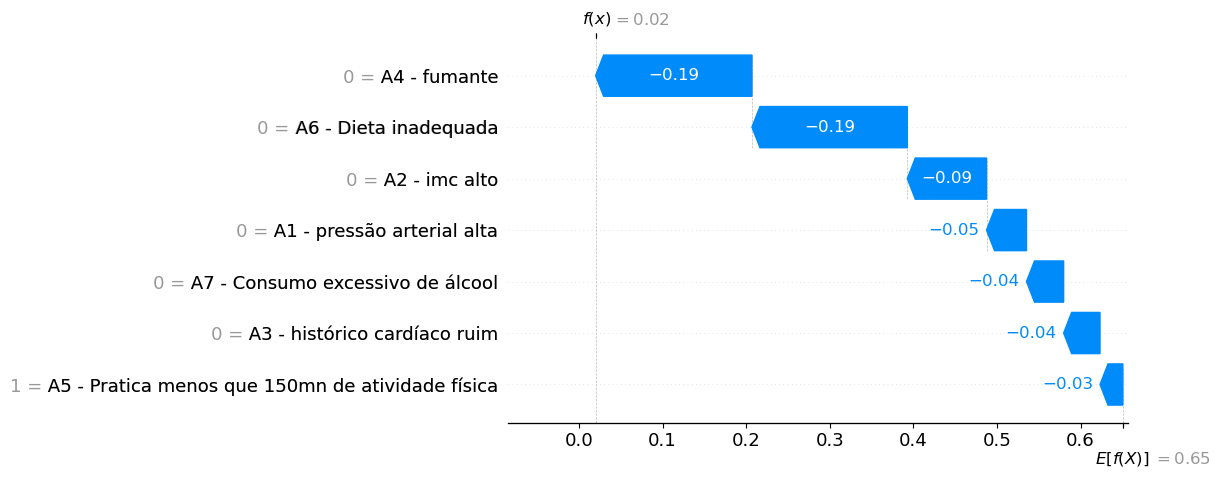

In [32]:
explainer = TreeExplainer(clf)
sv = explainer(X_train)
exp = Explanation(sv.values[:,:,1],
                  sv.base_values[:,1],
                  data=X_train,
                  feature_names=df_train.drop('Rótulo', axis=1).columns)
#INDICA O PACIENTE, INICIANDO EM 0.
#COM INDICES NEGATIVOS OS VALORES INICIARAM DO ULTIMO.
idx = 1
waterfall(exp[idx])

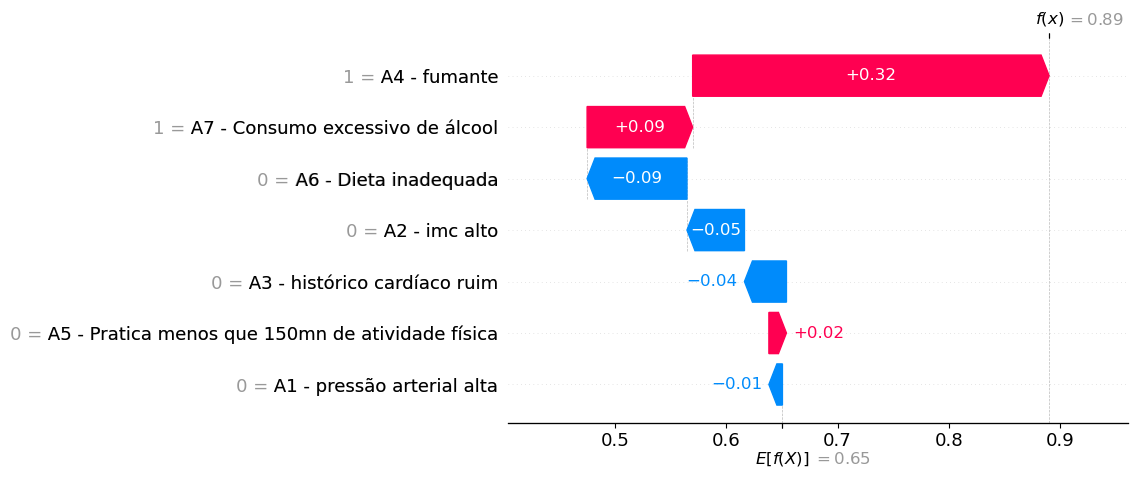

In [33]:
idx = 5
waterfall(exp[idx])

* Plotando o gráfico da última amostra

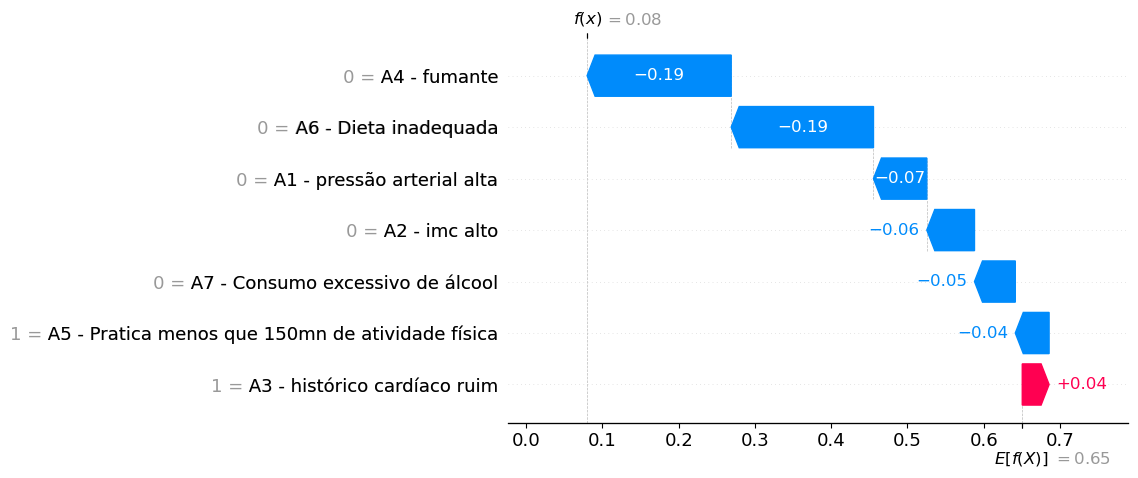

In [34]:
idx = -1
waterfall(exp[idx])

* Para gerar o gráfico waterfall no gradio, vamos adicionar uma linha ao final da nossa base de treinamento, conforme ilustrado a seguir:

In [35]:
X_train_expandido = np.vstack([X_train, np.array([[1, 1, 1, 0, 0, 0, 0]])])
X_train_expandido

array([[1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 0, 0],
       [1, 1, 1, 1, 0, 1, 1],
       [0, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 1],
       [1, 0, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0],
       [0, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 1, 0],
       [0, 0, 1, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0],
       [1, 1, 1, 0, 0, 0, 0]])

In [36]:
def make_prediction(pressao_arterial, imc, historico, fumante, pratica_menos_150mn, dieta_inadequada, consome_alcool):
    if (pressao_arterial.lower() == "sim"):
        pressao_arterial = 1
    else:
        pressao_arterial = 0
    if (imc.lower() == "sim"):
        imc = 1
    else:
        imc = 0

    if (historico.lower() == "sim"):
        historico = 1
    else:
        historico = 0

    if (fumante.lower() == "sim"):
        fumante = 1
    else:
        fumante = 0

    if (pratica_menos_150mn.lower() == "sim"):
        pratica_menos_150mn = 1
    else:
        ppratica_menos_150mn = 0

    if (dieta_inadequada.lower() == "sim"):
        dieta_inadequada = 1
    else:
        dieta_inadequada = 0

    if (consome_alcool.lower() == "sim"):
        consome_alcool = 1
    else:
        consome_alcool = 0

    preds = clf.predict([[pressao_arterial, imc, historico, fumante, pratica_menos_150mn, dieta_inadequada, consome_alcool]])
    # Concatenar a nova linha à matriz original
    X_train_expandido = np.vstack([X_train, np.array([[pressao_arterial, imc, historico, fumante, pratica_menos_150mn, dieta_inadequada, consome_alcool]])])

    explainer = TreeExplainer(clf)
    sv = explainer(X_train_expandido)
    exp = Explanation(sv.values[:,:,1],
                    sv.base_values[:,1],
                    data=X_train_expandido,
                    #feature_names=df_train.drop('Rótulo', axis=1).columns)
                    feature_names=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7'])
    #pegar a referência da figura
    fig = plt.figure(figsize=(6, 8))
    #último elemento que foi incluído agora
    idx = -1
    waterfall(exp[idx])

    #realizando a predição
    preds = clf.predict([[pressao_arterial, imc, historico, fumante, pratica_menos_150mn, dieta_inadequada, consome_alcool]])

    if preds[0] == 1:
        resp = f"""Você possui risco de uma doença cardíaca!
        O gráfico acima mostra (em percentual) como esses fatores estão aumentando/diminuindo seu risco cardíaco.\n
        A1 - Pressão Arterial Alta\n
        A2 - IMC Alto\n
        A3 - Histórico Cardíaco Ruim\n
        A4 - Fumante\n
        A5 - Pratica menos de 150mn atv semana\n
        A6 - Possui uma dieta inadequada\n
        A7 - Consome bebidas alcoólicas \n"""
    else:
        resp = f"""Atualmente você NÃO possui risco de uma doença cardíaca!
        O gráfico acima mostra (em percentual) como esses fatores estão aumentando/diminuindo seu risco cardíaco.\n
        A1 - Pressão Arterial Alta\n
        A2 - IMC Alto\n
        A3 - Histórico Cardíaco Ruim\n
        A4 - Fumante\n
        A5 - Pratica menos de 150mn atv semana\n
        A6 - Possui uma dieta inadequada\n
        A7 - Consome bebidas alcoólicas\n"""
        resp = "Atualmente você NÃO possui risco de uma doença cardíaca! O gráfico acima mostra (em percentual) como esses fatores estão aumentando/diminuindo seu risco cardíaco."
    return fig, resp


pressao_arterial = gr.Radio(['sim', 'não'], info = "Você tem pressão arterial acima de 140/90 mmHg?", label='Pressão Arterial')
imc = gr.Radio(['sim', 'não'], info = "Você tem índice de massa corporal (IMC) acima de 30?", label='IMC')
historico = gr.Radio(['sim', 'não'], info = "Você tem histórico familiar de doença cardíaca?", label='Histórico')
fumante = gr.Radio(['sim', 'não'], info = "Você fuma atualmente?", label='Fumante')
pratica_menos_150mn = gr.Radio(['sim', 'não'], info = "Você pratica menos de 150 minutos de atividade física por semana?", label='Pratica menos de 150mn atv semana')
dieta_inadequada = gr.Radio(['sim', 'não'], info = "Você possui uma dieta inadequada?", label='Possui uma dieta inadequada')
consome_alcool = gr.Radio(['sim', 'não'], info = "Você consome excessivamente bebidas alcoólicas?", label='Consome bebidas alcoólicas')

output1 = gr.Plot(label="Explicação de risco cardíaco")
output2 = gr.TextArea(label="Explicação de gráfico de risco cardíaco do paciente")

In [37]:
app = gr.Interface(fn = make_prediction, inputs=[pressao_arterial, imc, historico, fumante, pratica_menos_150mn, dieta_inadequada, consome_alcool], outputs=[output1, output2])
app.launch()

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "c:\Users\facps\anaconda3\Lib\site-packages\gradio\queueing.py", line 541, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\facps\anaconda3\Lib\site-packages\gradio\route_utils.py", line 276, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\facps\anaconda3\Lib\site-packages\gradio\blocks.py", line 1928, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\facps\anaconda3\Lib\site-packages\gradio\blocks.py", line 1514, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\facps\anaconda3\Lib\site-packages\anyio\to_thread.py", line 28, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(func, *args, cancellable=cancellable,
 

###DEIXE SEU FEEDEBACK
* Qualquer opinião ou dica de aprimormento é bem vinda, ainda é o início dos meus estudos mas o importate é o aprimoramento.
* Pode-se perceber que ocorre alguns erros com o modelo, visto que o número de dados está limitado tantos de treino como de teste.
* Indique dataframes para o estudo de doenças.
